In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Traffic forecast 
-P.Viswanadh

In [2]:
df=pd.read_csv("Train_fb.csv")

In [3]:
df.head(5)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [4]:
from prophet import Prophet

# Preprocessing

In [5]:
df["Datetime"]=pd.to_datetime(df["Datetime"],format="%d-%m-%Y %H:%M")

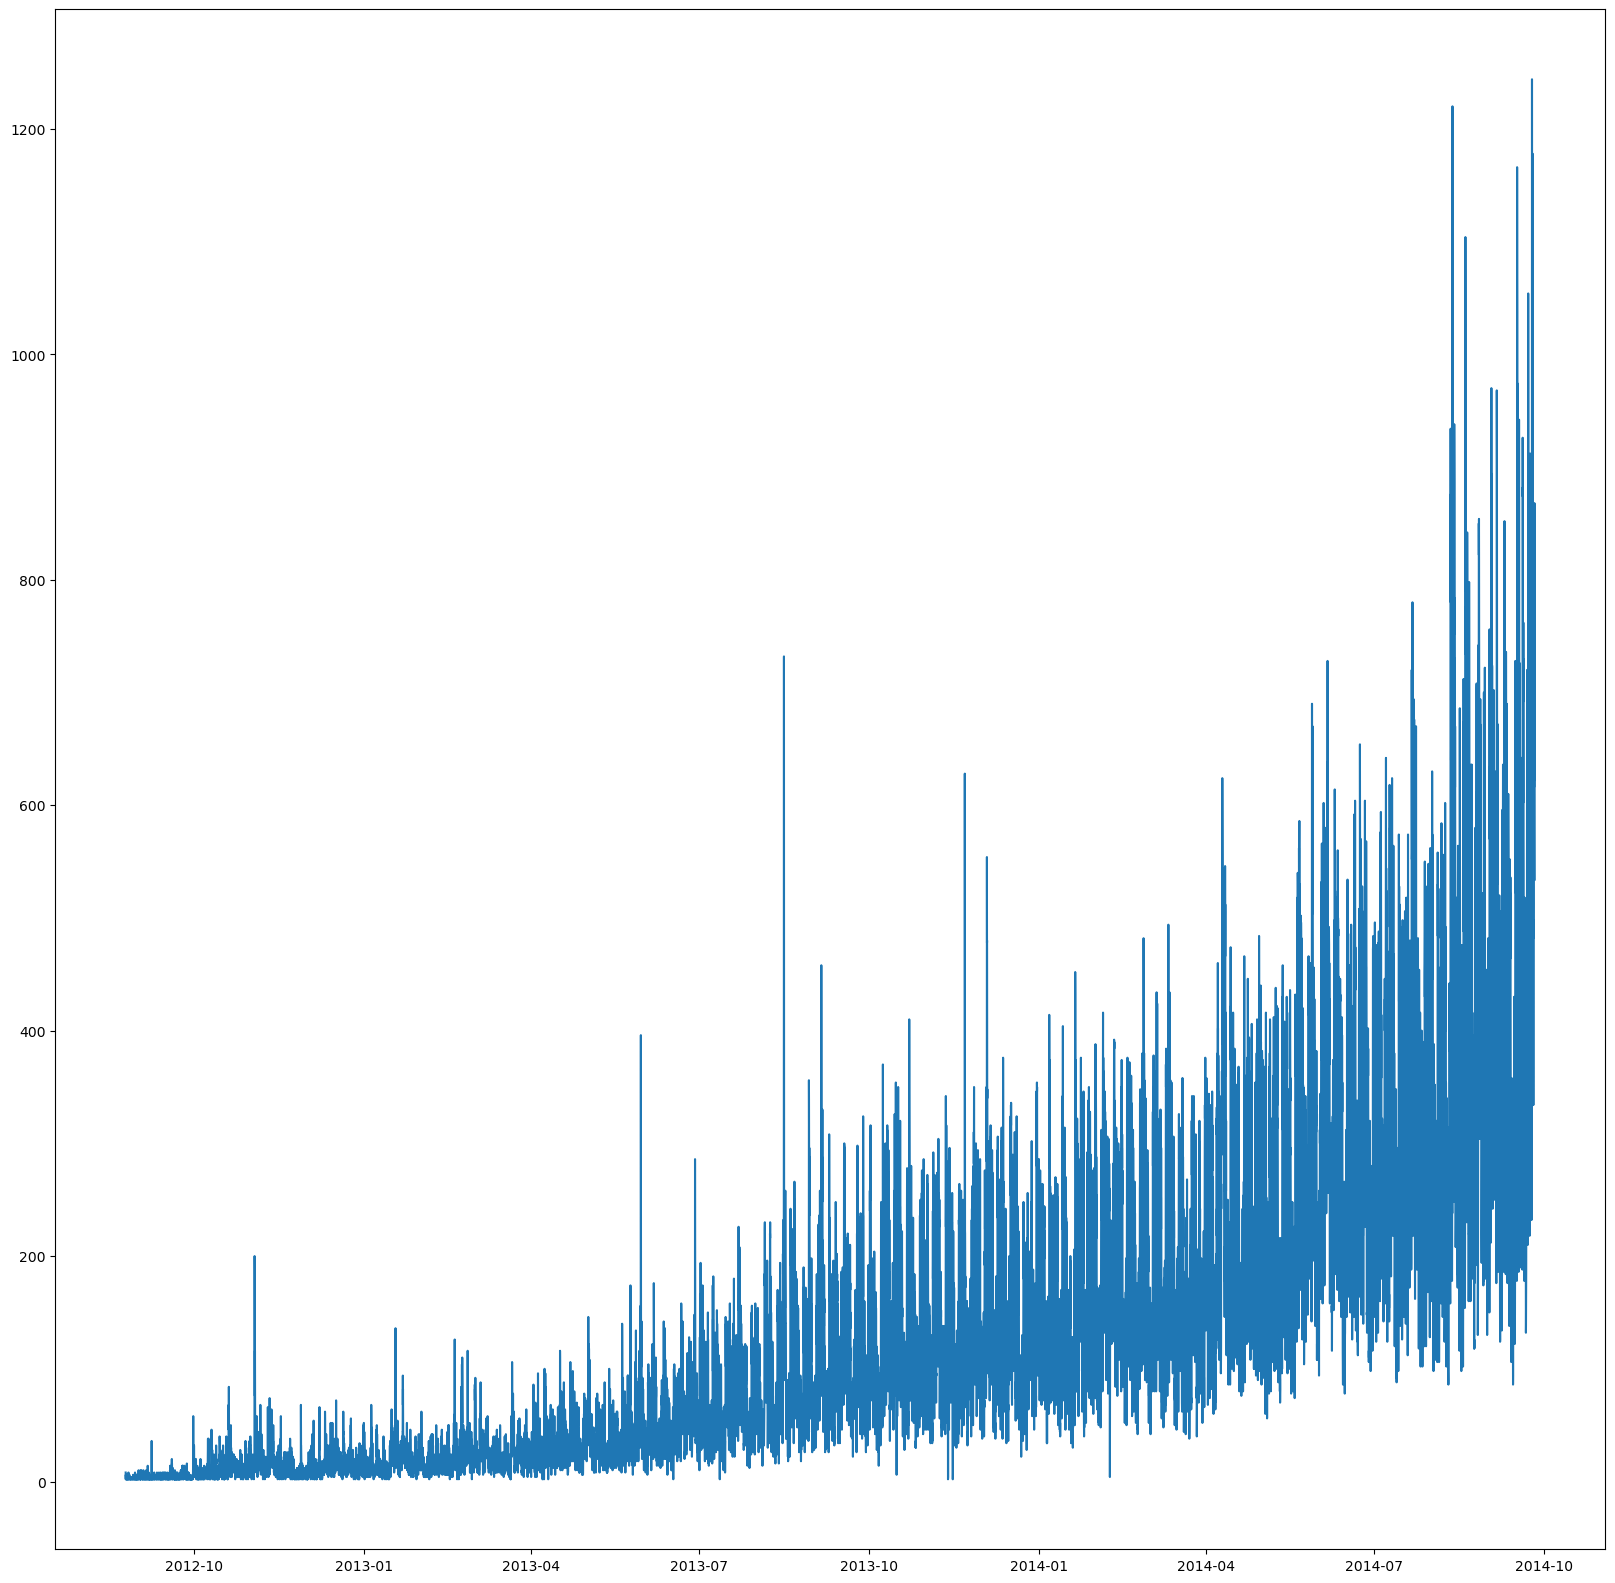

In [6]:
plt.figure(figsize=(20,20))
plt.plot(df["Datetime"],df["Count"])

In [7]:
df.index=df['Datetime']
df['y']=df['Count']
df.drop(columns=['Count','Datetime','ID'],axis=1,inplace=True)

In [8]:
df.head(5)

,y
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [9]:
df=df.resample('D').sum()

In [10]:
df.head(5)

,y
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60


In [11]:
len(df)

762

In [12]:
model=Prophet()

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
df.reset_index(inplace=True)

In [14]:
df.rename(columns={'Datetime':'ds','y':'y'},inplace=True)

In [15]:
df.head(5)

,ds,y
0,2012-08-25,76
1,2012-08-26,88
2,2012-08-27,62
3,2012-08-28,58
4,2012-08-29,60


In [16]:
m=model.fit(df)

22:02:24 - cmdstanpy - INFO - Chain [1] start processing
22:02:24 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
future=m.make_future_dataframe(periods=30)

In [18]:
forecast=m.predict(future)

# Forecasting predictions

<AxesSubplot:>

<Figure size 2000x2000 with 0 Axes>

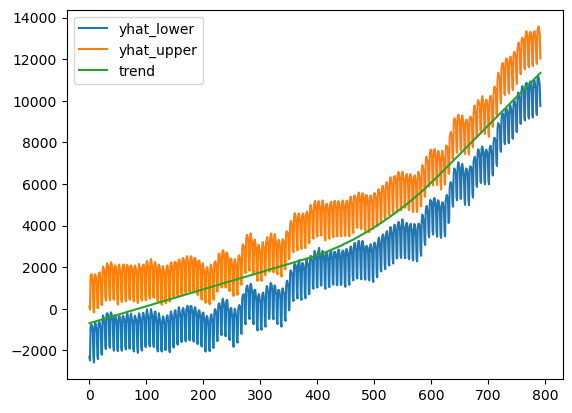

In [22]:
plt.figure(figsize=(20,20))
soothsay=forecast[["yhat_lower","yhat_upper","trend"]]
soothsay.plot(kind="line")

In [23]:
def forecast(days):
    future=m.make_future_dataframe(periods=days)
    forecast=m.predict(future)
    soothsay=forecast[["yhat_lower","yhat_upper","trend"]]
    soothsay.plot(kind="line")
    
    

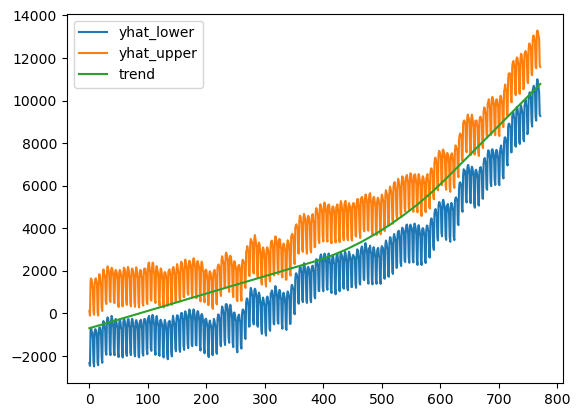

In [24]:
forecast(10)